# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [329]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [331]:
#A) seu código aqui
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [332]:
# Retirando o ',00' de Income
df['Income'] = df['Income'].str.replace(',00','')
df['Income'] = df['Income'].str.replace('.','')

# Transformando Income de object para int 
df['Income'] = df['Income'].astype(int)

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [333]:
#seu código aqui
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [334]:
# Verificando se há valores discrepantes
print(f"Média de idade: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")

Média de idade: 37.50769230769231
Mediana: 36.0


Como a média e a mediana estão próximos podemos substituir os valores nulos pela mediana 

In [335]:
# Mudando os valores nulos pela mediana 
df['Age'].fillna(df['Age'].median(), inplace=True)

In [336]:
# Verificando ainda há valores nulos
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [337]:
df['Gender'].value_counts()

Gender
Female    86
Male      78
Name: count, dtype: int64

In [338]:
df['Marital Status'].value_counts()

Marital Status
Married    87
Single     77
Name: count, dtype: int64

In [339]:
# Verificando se há dados digitados de forma errada
df['Education'].value_counts()

Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

In [340]:
df['Number of Children'].value_counts()

Number of Children
0    97
1    32
2    30
3     5
Name: count, dtype: int64

In [341]:
df['Home Ownership'].value_counts()

Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Não existem valores digitados errados em nenhuma coluna 

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [342]:
# Função describe
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [343]:
# Boxplot da coluna Income
px.box(df, y='Income', title='Boxplot de Income').show()

In [344]:
# Boxplot da coluna Idade
px.box(df, y='Age', title='Boxplot da Idade').show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [345]:
# Analise univariada
# Histograma da coluna Income
px.histogram(df, x='Income', title='Histograma de Income').show()

Valores dentro da normalidade, tendo como o valor de salario mais repetido o 85 mil com 8 pessoas.

In [346]:
# Gráfico de barras de Education
px.bar(df['Education'].value_counts(), title='Gráfico de barras de Education').show()

A Destribuição da graduação não parece ser uma coluna desbalanceada, pois a coluna com maior contagem tem apenas 17 a mais que a com menor contagem.

In [347]:
# Gráfico de bara para Children
px.bar(df['Number of Children'].value_counts(), title='Gráfico de barras de Number of Children').show()

Os dados da coluna 'Children' estão muito desbalanceados, teremos que aplicar alguma técnica de tratamento após o momento da divisão de treino e teste

In [348]:
# Histograma para Marital Status
px.histogram(df, x='Marital Status', title='Histograma de Marital Status').show()

A coluna de status de matrimonio também esta equilibrada!

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [349]:
# Não foram encontrados outliers.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



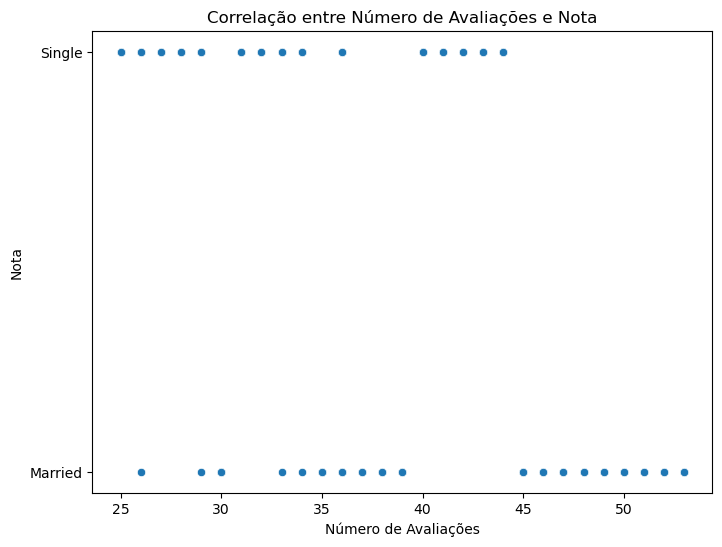

In [350]:
# Idade e Status Civil
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['Marital Status'])
plt.title("Correlação entre Número de Avaliações e Nota")
plt.xlabel("Número de Avaliações")
plt.ylabel("Nota")
plt.show()

É possível identificar que a partir dos 45 anos temos somente clientes casados.

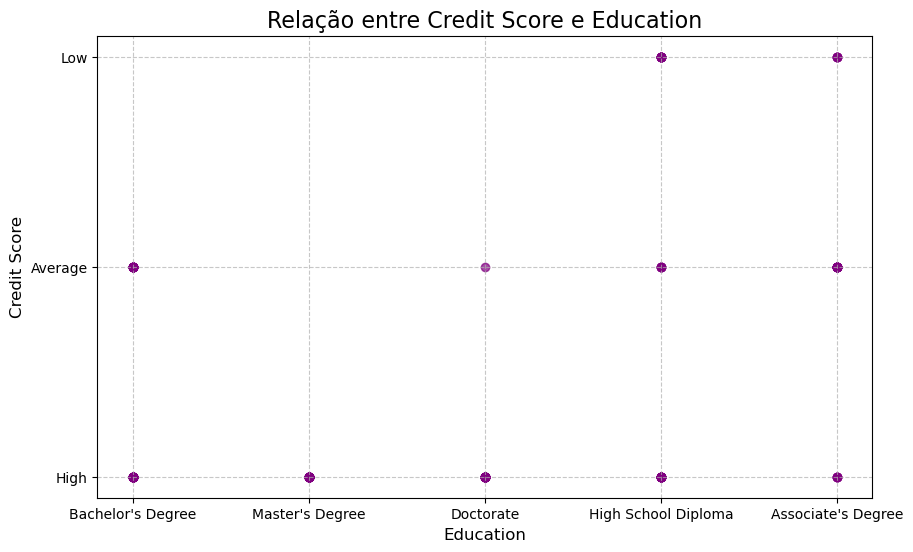

In [351]:
# Crédito x EscolarEducation
plt.figure(figsize=(10, 6))
plt.scatter(df['Education'], df['Credit Score'], color='purple', alpha=0.7)
#Notem que plt scatter é a função que usamos para plotar o gráfico de dispersão

# Adicionando legendas e rótulos
plt.title('Relação entre Credit Score e Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Todos os graduados mestres tem um alto score de crédito e os baichareis e doutores tem créditos altos e médios.

In [352]:
# Gráfico de barra Income por idade
# Agrupando os dados por idade e calculando a média do salario para cada idade
salario_por_profissao = df.groupby('Age')['Income'].mean().reset_index()

# Criando o gráfico de barras horizontais, muito semelhante a biblioteca matplot
fig = px.bar(salario_por_profissao, x='Income', y='Age', orientation='h',
             title='Incomes por Age',
             labels={'Income': 'Income Médio', 'Age': 'Age'})

# Exibindo o gráfico
fig.show()

É possível identificar que o valor do salário vai aumentado conforme a idade aumenta 

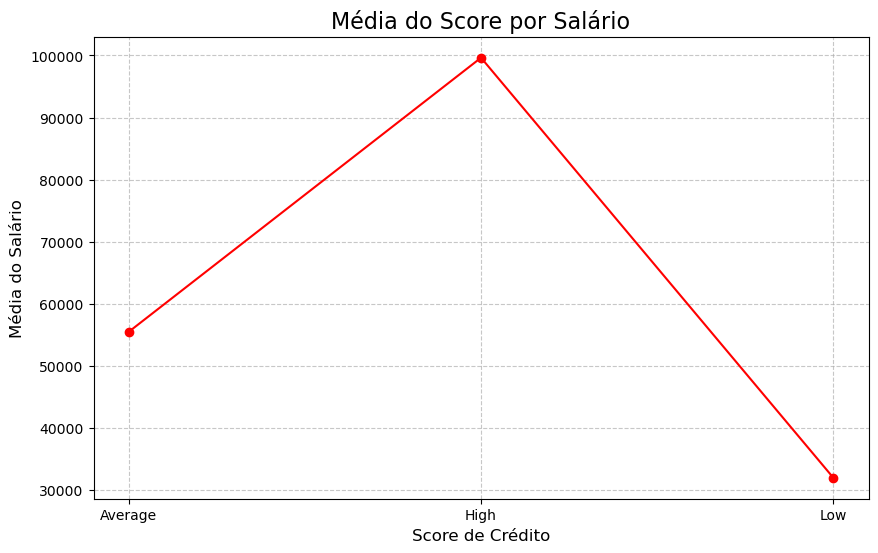

In [353]:
# Salário x Credit Score
# Calculando a média do score para cada idade com agrupamento
media_score_por_idade = df.groupby('Credit Score')['Income'].mean()

# Ordenando as idades em ordem crescente utilizando o sort_index
media_score_por_idade = media_score_por_idade.sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_score_por_idade.index, media_score_por_idade, marker='o', color='red')
# plt.plot() é usado para criar um gráfico de linha
# marker='o' especifica que os pontos no gráfico serão marcados com círculos ('o')


# Adicionando as legendas dos rótulos
plt.title('Média do Score por Salário', fontsize=16)
plt.xlabel('Score de Crédito', fontsize=12)
plt.ylabel('Média do Salário', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

A média de salários mais altos tem o score de crédito mais altos enquanto as pessoas com ps salários mais baixos tem os score mais baixos e os com o salário entre o ponto máximo e mínimo tem um score médio.

In [354]:
# Casa própria x Credit Score
fig = px.histogram(df, x='Home Ownership', color='Credit Score', barmode='stack')
fig.update_layout(title='Relação entre Home Ownership e Credito',
                  xaxis_title='Home Ownership',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

Aqui é possível ver que quem tem casa própria tem maior probabilidade de ter um score de crédito maior do que as pessoas que pagam aluguel.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [355]:
# Casa própria x Status Civil
fig = px.histogram(df, x='Home Ownership', color='Marital Status', barmode='stack')
fig.update_layout(title='Relação entre Home Ownership e Marital Status',
                  xaxis_title='Home Ownership',
                  yaxis_title='Contagem',
                  legend_title='Marital Status')
fig.show()

Aqui podemos ver que a maioria das pessoas que são casadas tem sua casa própria enquanto as solteiras estão, em sua maioria, de aluguel.

In [356]:
# Numero de filhos x Credit Score
fig = px.histogram(df, x='Number of Children', color='Credit Score', barmode='stack')
fig.update_layout(title='Relação entre Number of Children e Credit Score', 
                  xaxis_title='Number of Children', 
                  yaxis_title='Contagem', 
                  legend_title='Credit Score')
fig.show()

Para 0 filhos parece não ter relação, porém a partir de 1 filho a pessoa já começa a ter uma probalidade maior de ter um score mais alto de crédito. 

In [357]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [358]:
# Educatio x Casa própria
fig = px.histogram(df, x='Education', color='Home Ownership', barmode='stack')
fig.update_layout(title='Relação entre Education e Home Ownership',
                  xaxis_title='Education',
                  yaxis_title='Contagem',
                  legend_title='Home Ownership')
fig.show()

Pessoas com Mestrado e Doutoraso tendem a ter suas próprias casas

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

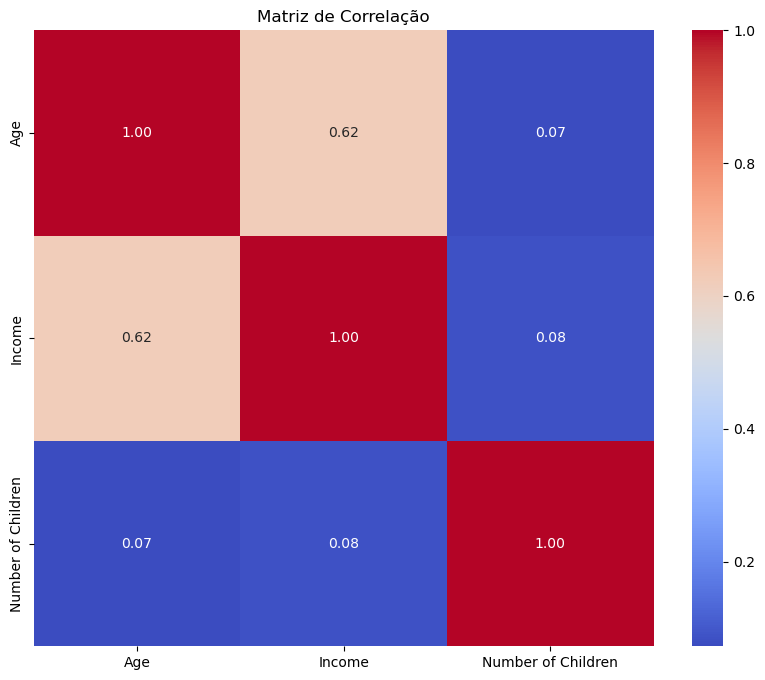

In [359]:
# Cluster Map
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

A coluna Income tem uma correlação positiva com a coluna Age, o que já era possível ver no gráfico de barras que fizemos anteriormente. 

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [360]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [361]:
# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Martial Status"
df['Marital Status_encoded'] = label_encoder.fit_transform(df['Marital Status'])

In [362]:
# Aplicando o Label Encoder para a coluna "Home Ownership"
df['Home Ownership_encoded'] = label_encoder.fit_transform(df['Home Ownership'])

In [363]:
# Aplicando o Label Encoder para a coluna "Gender"
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [364]:
# Aplicando o Label Encoder para a coluna "Credit Score"
df['Credit Score'] = label_encoder.fit_transform(df['Credit Score'])

In [365]:
# Aplicar o One Hot para a coluna "Education"
df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)

In [366]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

      Age  Gender  Income Marital Status  Number of Children Home Ownership  \
0    25.0       0   50000         Single                   0         Rented   
1    30.0       1  100000        Married                   2          Owned   
2    35.0       0   75000        Married                   1          Owned   
3    40.0       1  125000         Single                   0          Owned   
4    45.0       0  100000        Married                   3          Owned   
..    ...     ...     ...            ...                 ...            ...   
159  29.0       0   27500         Single                   0         Rented   
160  34.0       1   47500         Single                   0         Rented   
161  39.0       0   62500        Married                   2          Owned   
162  44.0       1   87500         Single                   0          Owned   
163  49.0       0   77500        Married                   1          Owned   

     Credit Score  Marital Status_encoded  Home Own

In [367]:
df.head(10)

,Age,Gender,Income,Marital Status,Number of Children,Home Ownership,Credit Score,Marital Status_encoded,Home Ownership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,0,50000,Single,0,Rented,1,1,1,1,0,0,0
1,30.0,1,100000,Married,2,Owned,1,0,0,0,0,0,1
2,35.0,0,75000,Married,1,Owned,1,0,0,0,1,0,0
3,40.0,1,125000,Single,0,Owned,1,1,0,0,0,1,0
4,45.0,0,100000,Married,3,Owned,1,0,0,1,0,0,0
5,50.0,1,150000,Married,0,Owned,1,0,0,0,0,0,1
6,26.0,0,40000,Single,0,Rented,0,1,1,0,0,0,0
7,31.0,1,60000,Single,0,Rented,0,1,1,1,0,0,0
8,36.0,0,80000,Married,2,Owned,1,0,0,0,0,0,1
9,36.0,1,105000,Single,0,Owned,1,1,0,0,1,0,0


In [368]:
# Dropando as colunas
df = df.drop(['Marital Status'], axis=1)
df = df.drop(['Home Ownership'], axis=1)
df = df.drop(['Gender'], axis=1)

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

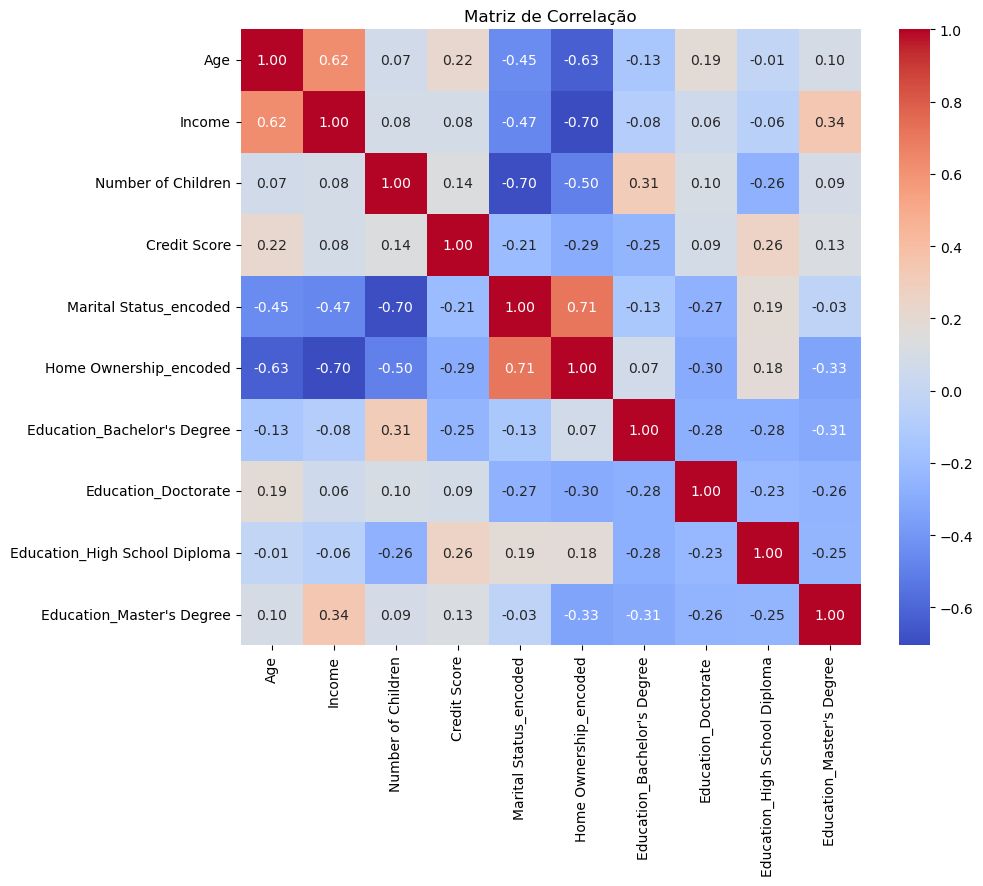

In [369]:
# Cluster Map
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [370]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [371]:
# Verificando os tamanhos dos conjuntos de treino e teste
print("Tamanho de X_train:", X_train.shape)
print("\nTamanho de X_test:", X_test.shape)
print("\nTamanho de y_train:", y_train.shape)
print("\nTamanho de y_test:", y_test.shape)

Tamanho de X_train: (123, 9)

Tamanho de X_test: (41, 9)

Tamanho de y_train: (123,)

Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score'>

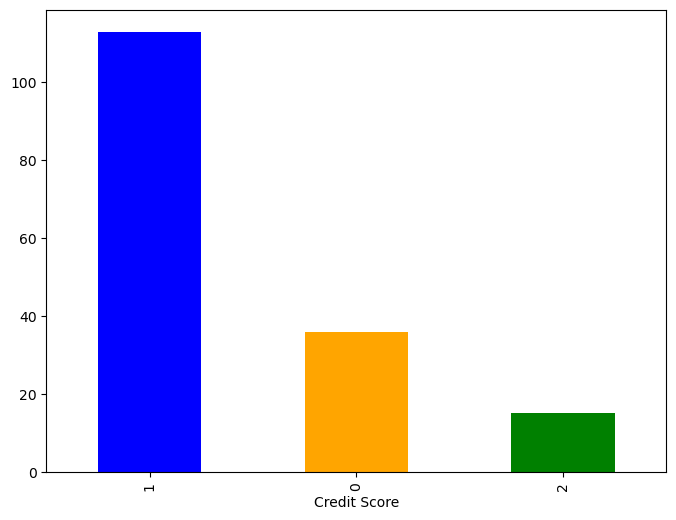

In [372]:
# Balanceamento
churn_counts = df['Credit Score'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

In [373]:
# Calcular e imprimir as porcentagens dos valores na coluna 'churn'
print((df['Credit Score'].value_counts(normalize=True) * 100))

Credit Score
1    68.902439
0    21.951220
2     9.146341
Name: proportion, dtype: float64


Praticamente 70% dos nossos dados são de score de crédito alto, não sendo o ideal para um modelo de predição.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [376]:
# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Credit Score
0    84
2    84
1    84
Name: count, dtype: int64
